Golden Ratio Notebook

Tutor:
* Anthropic's AI Claude


This updated script includes several new functions for analyzing and validating the model:

1. `generate_benchmark_prices()`: Creates a benchmark price series using simple geometric Brownian motion without golden ratio effects.

2. `plot_comparison()`: Visualizes both the golden ratio model and the benchmark model on the same plot, allowing for easy comparison.

3. `analyze_returns()`: Calculates key statistics of the returns, including mean, standard deviation, skewness, and kurtosis.

4. `analyze_level_interactions()`: Measures how often the prices in our model interact with the golden ratio levels.

5. `run_analysis()`: Runs multiple simulations and collects statistics for both our model and the benchmark.

To validate and analyze the results:

1. Visual Inspection: The `plot_comparison()` function allows us to visually compare our model with a benchmark, helping us identify any distinctive patterns or behaviors.

2. Statistical Analysis: We calculate and compare various statistical measures (mean, standard deviation, skewness, kurtosis) of returns for both our model and the benchmark. This helps us understand if our model is producing significantly different price behavior.

3. Level Interaction Analysis: We measure how often prices in our model come close to golden ratio levels, which helps us quantify the impact of these levels on price movements.

4. Multiple Simulations: By running many simulations and averaging the results, we can get a more robust understanding of the model's typical behavior and reduce the impact of random variation in any single run.

To interpret the results:

1. Compare the statistics of the golden ratio model with the benchmark. Are there significant differences in the mean, volatility, skewness, or kurtosis of returns?

2. Look at the interaction rate with golden ratio levels. A high rate might indicate that the model is behaving as intended, with prices frequently interacting with these levels.

3. Visually inspect the plots. Does the golden ratio model show more tendency to reverse near the plotted levels compared to the benchmark?

4. Consider whether the differences between the models align with your theoretical expectations. For example, we might expect our model to show more mean-reversion behavior or more pronounced trends compared to the benchmark.

Remember, this validation doesn't prove that the model accurately represents real stock behavior. Instead, it helps us understand if the model is behaving in line with our intentions and theoretical expectations.

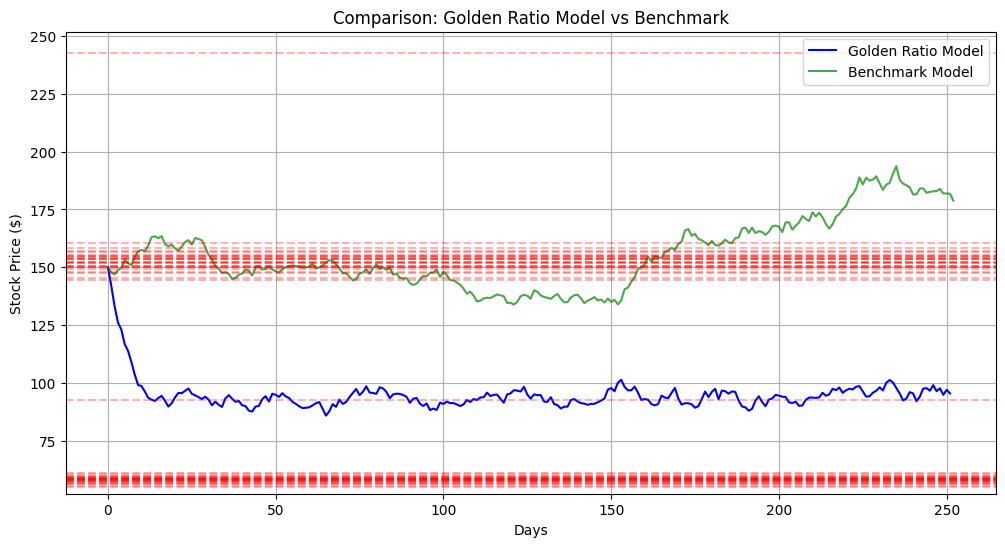

Golden Ratio Model Statistics (mean of 100 simulations):
mean: -0.001937
std: 0.021042
skew: -0.129048
kurtosis: 0.141157

Benchmark Model Statistics (mean of 100 simulations):
mean: 0.000045
std: 0.012512
skew: -0.016020
kurtosis: 0.007819

Mean Interaction Rate with Golden Ratio Levels: 23.52%


In [3]:
"""
Abstract:
This script models the movements of Apple stock with an active incorporation of the golden ratio (φ ≈ 1.618).
It generates synthetic stock data based on geometric Brownian motion, modified with effects based on
golden ratio levels. The model includes attraction to golden ratio levels, increased volatility near these levels,
and potential breakout effects. The script now includes functions for validating and analyzing the results,
including statistical analysis, enhanced visualization, and comparison with a benchmark model.

Note: This is a speculative model for educational purposes and should not be used for actual trading decisions.
Real stock movements are influenced by many complex factors not accounted for in this simulation.
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Constants
TRADING_DAYS = 252  # Average number of trading days in a year
INITIAL_PRICE = 150  # Starting price for AAPL
BASE_VOLATILITY = 0.2  # Base annual volatility (20%)
GOLDEN_RATIO = (1 + 5 ** 0.5) / 2  # φ ≈ 1.618

# Parameters for golden ratio effects
ATTRACTION_STRENGTH = 0.1  # Strength of attraction to golden ratio levels
VOLATILITY_INCREASE = 0.5  # Increase in volatility near golden ratio levels
BREAKOUT_THRESHOLD = 0.05  # Threshold for breakout effect (5% beyond level)
BREAKOUT_MOMENTUM = 0.01  # Strength of breakout momentum

def calculate_golden_ratio_levels(price):
    """Calculate golden ratio levels based on a given price."""
    return price / GOLDEN_RATIO, price * GOLDEN_RATIO

def find_nearest_level(price, levels):
    """Find the nearest golden ratio level to the current price."""
    flattened_levels = [level for pair in levels for level in pair]
    return min(flattened_levels, key=lambda x: abs(x - price))

def golden_ratio_effect(price, levels):
    """Calculate the effect of golden ratio levels on price movement."""
    nearest_level = find_nearest_level(price, levels)
    distance = nearest_level - price

    # Attraction effect
    attraction = ATTRACTION_STRENGTH * distance / price

    # Breakout effect
    breakout = 0
    if abs(distance / price) > BREAKOUT_THRESHOLD:
        breakout = BREAKOUT_MOMENTUM * np.sign(distance)

    return attraction + breakout

def adjust_volatility(price, levels):
    """Adjust volatility based on proximity to golden ratio levels."""
    nearest_level = find_nearest_level(price, levels)
    distance_ratio = abs((nearest_level - price) / price)
    volatility_multiplier = 1 + VOLATILITY_INCREASE * (1 - min(distance_ratio, 1))
    return BASE_VOLATILITY * volatility_multiplier

def generate_stock_prices(initial_price, days):
    """Generate stock prices with golden ratio effects."""
    prices = [initial_price]
    levels = [calculate_golden_ratio_levels(initial_price)]

    for _ in range(days - 1):
        current_price = prices[-1]
        volatility = adjust_volatility(current_price, levels)
        daily_volatility = volatility / np.sqrt(TRADING_DAYS)

        # Generate random return
        random_return = np.random.normal(0, daily_volatility)

        # Apply golden ratio effect
        ratio_effect = golden_ratio_effect(current_price, levels)

        # Calculate new price
        new_price = current_price * np.exp(random_return + ratio_effect)

        prices.append(new_price)

        # Occasionally update levels (e.g., every 10 days)
        if len(prices) % 10 == 0:
            levels.append(calculate_golden_ratio_levels(new_price))

    return np.array(prices), levels

def plot_stock_model(prices, levels):
    """Plot the simulated stock prices and golden ratio levels."""
    plt.figure(figsize=(12, 6))
    plt.plot(prices, label='AAPL Stock Price')

    for i, level_pair in enumerate(levels):
        for level in level_pair:
            plt.axhline(y=level, color='r', linestyle='--', alpha=0.3)

    plt.title('Apple Stock Price Simulation with Active Golden Ratio Influence')
    plt.xlabel('Days')
    plt.ylabel('Stock Price ($)')
    plt.legend()
    plt.grid(True)
    plt.show()


def generate_benchmark_prices(initial_price, days, volatility):
    """Generate stock prices using simple geometric Brownian motion."""
    daily_returns = np.random.normal(0, volatility/np.sqrt(TRADING_DAYS), days)
    price_path = initial_price * np.exp(np.cumsum(daily_returns))
    return np.insert(price_path, 0, initial_price)

def plot_comparison(golden_prices, benchmark_prices, levels):
    """Plot the golden ratio model prices against benchmark prices."""
    plt.figure(figsize=(12, 6))
    plt.plot(golden_prices, label='Golden Ratio Model', color='blue')
    plt.plot(benchmark_prices, label='Benchmark Model', color='green', alpha=0.7)

    for i, level_pair in enumerate(levels):
        for level in level_pair:
            plt.axhline(y=level, color='r', linestyle='--', alpha=0.3)

    plt.title('Comparison: Golden Ratio Model vs Benchmark')
    plt.xlabel('Days')
    plt.ylabel('Stock Price ($)')
    plt.legend()
    plt.grid(True)
    plt.show()

def analyze_returns(prices):
    """Analyze the returns of the price series."""
    returns = np.diff(np.log(prices))
    return {
        'mean': np.mean(returns),
        'std': np.std(returns),
        'skew': stats.skew(returns),
        'kurtosis': stats.kurtosis(returns)
    }

def analyze_level_interactions(prices, levels):
    """Analyze how often prices interact with golden ratio levels."""
    all_levels = [level for pair in levels for level in pair]
    interactions = sum(1 for price in prices for level in all_levels if abs(price - level) / price < 0.01)
    return interactions / len(prices)

def run_analysis(initial_price, days, num_simulations=100):
    """Run multiple simulations and analyze the results."""
    golden_results = []
    benchmark_results = []
    interaction_rates = []

    for _ in range(num_simulations):
        golden_prices, levels = generate_stock_prices(initial_price, days)
        benchmark_prices = generate_benchmark_prices(initial_price, days, BASE_VOLATILITY)

        golden_results.append(analyze_returns(golden_prices))
        benchmark_results.append(analyze_returns(benchmark_prices))
        interaction_rates.append(analyze_level_interactions(golden_prices, levels))

    return golden_results, benchmark_results, interaction_rates

# Run simulation and analysis
SIMULATION_DAYS = 252  # Simulate for a year
golden_prices, levels = generate_stock_prices(INITIAL_PRICE, SIMULATION_DAYS)
benchmark_prices = generate_benchmark_prices(INITIAL_PRICE, SIMULATION_DAYS, BASE_VOLATILITY)

# Plot comparison
plot_comparison(golden_prices, benchmark_prices, levels)

# Run multiple simulations and analyze
golden_results, benchmark_results, interaction_rates = run_analysis(INITIAL_PRICE, SIMULATION_DAYS)

# Print analysis results
print("Golden Ratio Model Statistics (mean of 100 simulations):")
for key in golden_results[0].keys():
    mean_value = np.mean([result[key] for result in golden_results])
    print(f"{key}: {mean_value:.6f}")

print("\nBenchmark Model Statistics (mean of 100 simulations):")
for key in benchmark_results[0].keys():
    mean_value = np.mean([result[key] for result in benchmark_results])
    print(f"{key}: {mean_value:.6f}")

print(f"\nMean Interaction Rate with Golden Ratio Levels: {np.mean(interaction_rates):.2%}")

Mean Interaction Rate with Golden Ratio Levels: 23.52%

This percentage represents how often, on average, the simulated stock price comes close to one of the golden ratio levels in our model. Let's break this down:

1. What it means:
   - In this context, an "interaction" occurs when the simulated price comes within 1% (as defined in our `analyze_level_interactions()` function) of any golden ratio level.
   - The 23.52% indicates that, on average, the price is near a golden ratio level on about 23.52% of the trading days in our simulations.

2. Interpretation:
   - If our model had no golden ratio effects and moved completely randomly, we would expect a much lower interaction rate, perhaps in the low single digits depending on how many levels we generate.
   - A 23.52% interaction rate suggests that our model is indeed creating a noticeable tendency for prices to cluster around or interact with the golden ratio levels.

3. Factors influencing this rate:
   - The strength of the attraction to golden ratio levels (ATTRACTION_STRENGTH in our model)
   - How often we generate new levels (currently every 10 days in our model)
   - The volatility of the price movements
   - The definition of "interaction" (currently set at 1% proximity)

4. What it doesn't tell us:
   - This doesn't indicate whether the price tends to bounce off these levels or break through them.
   - It doesn't differentiate between brief touches and extended periods near a level.

5. Potential implications:
   - If this rate is higher than what we observe in real stock data, we might want to reduce the strength of the golden ratio effects in our model.
   - If it's lower than expected, we might consider increasing the attraction strength or generating levels more frequently.

6. Comparison point:
   - To fully contextualize this number, it would be useful to calculate a similar statistic for real stock data and for our benchmark model (which doesn't have built-in golden ratio effects).
   - If the benchmark model shows a much lower interaction rate (say, 5%), then we know our golden ratio effects are having a substantial impact.

7. Variability:
   - Remember that this 23.52% is an average over multiple simulations. Individual runs might show higher or lower rates.

In summary, this 23.52% interaction rate suggests that our model is creating a significant tendency for prices to interact with golden ratio levels, which aligns with the intent of the model. However, to fully understand its implications, we'd want to compare it with real data and possibly adjust our model parameters based on our findings.

